# Decision tree classification algorithm on DNA sequences

In [1]:
# Hide warnings
import warnings
warnings.simplefilter('ignore')

## Step 1: Importing the Dataset¶
The following code cells will import necessary libraries and import the dataset from the UCI repository as a Pandas DataFrame.

In [2]:
#import and change module name
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/molecular-biology/promoter-gene-sequences/promoters.data'
data = pd.read_csv(url)
data.head()

,+,S10,\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataatgcgcgggcttgtcgt
0,+,AMPC,\t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
1,+,AROH,\t\tgtactagagaactagtgcattagcttatttttttgttatcat...
2,+,DEOP2,\taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...
3,+,LEU1_TRNA,\ttcgataattaactattgacgaaaagctgaaaaccactagaatgc...
4,+,MALEFG,\taggggcaaggaggatggaaagaggttgccgtataaagaaactag...


In [3]:
names = ['Class', 'gene_symbol', 'Sequence']
data = pd.read_csv(url, names = names)
data.head()

,Class,gene_symbol,Sequence
0,+,S10,\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
1,+,AMPC,\t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
2,+,AROH,\t\tgtactagagaactagtgcattagcttatttttttgttatcat...
3,+,DEOP2,\taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...
4,+,LEU1_TRNA,\ttcgataattaactattgacgaaaagctgaaaaccactagaatgc...


In [4]:
data.shape

(106, 3)

In [5]:
data.dtypes

Class          object
gene_symbol    object
Sequence       object
dtype: object

## Step 2: Preprocessing the Dataset
The data as it is can'be used for further analysis and has to be preprocessed.

In [6]:
# Build our dataset using custom pandas dataframe
classes = data.loc[:,'Class']
classes.head()

0    +
1    +
2    +
3    +
4    +
Name: Class, dtype: object

In [7]:
sequences = list(data.loc[:, 'Sequence'])
sequences

['\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataatgcgcgggcttgtcgt',
 '\t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaatctaacgcatcgccaa',
 '\t\tgtactagagaactagtgcattagcttatttttttgttatcatgctaaccacccggcg',
 '\taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaatactaacaaactc',
 '\ttcgataattaactattgacgaaaagctgaaaaccactagaatgcgcctccgtggtag',
 '\taggggcaaggaggatggaaagaggttgccgtataaagaaactagagtccgtttaggt',
 '\t\tcagggggtggaggatttaagccatctcctgatgacgcatagtcagcccatcatgaat',
 '\t\ttttctacaaaacacttgatactgtatgagcatacagtataattgcttcaacagaaca',
 '\t\tcgacttaatatactgcgacaggacgtccgttctgtgtaaatcgcaatgaaatggttt',
 '\tttttaaatttcctcttgtcaggccggaataactccctataatgcgccaccactgaca',
 '\tgcaaaaataaatgcttgactctgtagcgggaaggcgtattatgcacaccccgcgccg',
 '\tcctgaaattcagggttgactctgaaagaggaaagcgtaatatacgccacctcgcgac',
 '\tgatcaaaaaaatacttgtgcaaaaaattgggatccctataatgcgcctccgttgaga',
 '\tctgcaatttttctattgcggcctgcggagaactccctataatgcgcctccatcgaca',
 '\ttttatatttttcgcttgtcaggccggaataactccctataatgcgccaccactgaca',
 '\taagcaaagaaatgcttgactctgt

In [8]:
#Remove tab from each sequence
dic = {}
for i, seq in enumerate(sequences):
    nucleotides = list(seq)
    nucleotides = [char for char in nucleotides if char != '\t']
    #append class assignment
    nucleotides.append(classes[i])
    dic[i] = nucleotides
print(dic[0])

['t', 'a', 'c', 't', 'a', 'g', 'c', 'a', 'a', 't', 'a', 'c', 'g', 'c', 't', 't', 'g', 'c', 'g', 't', 't', 'c', 'g', 'g', 't', 'g', 'g', 't', 't', 'a', 'a', 'g', 't', 'a', 't', 'g', 't', 'a', 't', 'a', 'a', 't', 'g', 'c', 'g', 'c', 'g', 'g', 'g', 'c', 't', 't', 'g', 't', 'c', 'g', 't', '+']


In [9]:
# Convert Dict object into dataframe
df = pd.DataFrame(dic)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
0,t,t,g,a,t,a,c,t,c,t,...,c,c,t,a,g,c,g,c,c,t
1,a,g,t,a,c,g,a,t,g,t,...,c,g,a,g,a,c,t,g,t,a
2,c,c,a,t,g,g,g,t,a,t,...,g,c,t,a,g,t,a,c,c,a
3,t,t,c,t,a,g,g,c,c,t,...,a,t,g,g,a,c,t,g,g,c
4,a,a,t,g,t,g,g,t,t,a,...,g,a,a,g,g,a,t,a,t,a


In [10]:
# transpose dataframe into correct format
df = df.transpose()
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,t,a,c,t,a,g,c,a,a,t,...,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,...,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,...,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,...,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,...,c,c,g,t,g,g,t,a,g,+


In [11]:
# Rename
df.rename(columns = {57:'Class'}, inplace = True)

In [12]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,Class
0,t,a,c,t,a,g,c,a,a,t,...,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,...,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,...,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,...,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,...,c,c,g,t,g,g,t,a,g,+


In [13]:
# we can't run machine learning algorithms on string formats data. We need to switch to numerical data. 
numerical_df = pd.get_dummies(df)
numerical_df.iloc[:5]

,0_a,0_c,0_g,0_t,1_a,1_c,1_g,1_t,2_a,2_c,...,55_a,55_c,55_g,55_t,56_a,56_c,56_g,56_t,Class_+,Class_-
0,0,0,0,1,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
1,0,0,0,1,0,0,1,0,0,1,...,1,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4,0,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [14]:
# Drop class_- or Class_+
numerical_df.drop('Class_-', axis = 1, inplace = True)
numerical_df.head()

,0_a,0_c,0_g,0_t,1_a,1_c,1_g,1_t,2_a,2_c,...,54_t,55_a,55_c,55_g,55_t,56_a,56_c,56_g,56_t,Class_+
0,0,0,0,1,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,1
1,0,0,0,1,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
2,0,0,1,0,0,0,0,1,1,0,...,0,0,1,0,0,0,0,1,0,1
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
4,0,0,0,1,0,1,0,0,0,0,...,1,1,0,0,0,0,0,1,0,1


In [15]:
# rename Class_+ to Class
numerical_df.rename(columns = {'Class_+':'Class'}, inplace = True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,Class
0,t,a,c,t,a,g,c,a,a,t,...,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,...,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,...,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,...,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,...,c,c,g,t,g,g,t,a,g,+


## Step 3: Decision tree algorithm
Now that we have preprocessed the data, we have to built our training and testing datasets.

In [16]:
from sklearn.model_selection import train_test_split
X = numerical_df.drop(['Class'], axis = 1).values
y = numerical_df['Class'].values

#define a seed for reproducibility
seed = 1

# Splitting data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)

In [17]:
print("X_train has shape: {}".format(X_train.shape))
print("X_test has shape: {}".format(X_test.shape))
print("y_train has shape: {}".format(y_train.shape))
print("y_test has shape: {}".format(y_test.shape))

X_train has shape: (84, 228)
X_test has shape: (22, 228)
y_train has shape: (84,)
y_test has shape: (22,)


### Building Decision Tree Model

In [18]:
from sklearn.tree import DecisionTreeClassifier
# Model building to train
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = 5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [21]:
from sklearn.model_selection import GridSearchCV
kfold = 10
# model training
def training_model(X_train, y_train):
        model = DecisionTreeClassifier(criterion='gini', splitter='best', 
                                       max_depth=None, min_samples_split=2, 
                                       min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                       max_features=None, random_state=None, 
                                       max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                       min_impurity_split=None, class_weight=None, 
                                       presort=False)
        # parameters
        parameters = {'max_depth'     : [4,6,8,10,12],
                      'criterion'     : ['gini', 'entropy'],
                      'splitter'      : ['best', 'random'],
                      'min_weight_fraction_leaf'  : [0.0,0.1,0.2,0.3],
                      'random_state' : [7,23,42,78,142],
                      'min_impurity_decrease' : [0.0,0.05,0.1,0.2]
                      # Add more parameters here for tuning
                      }
        grid = GridSearchCV(estimator=model, param_grid = parameters, cv = kfold, 
                            verbose = 1, n_jobs = -1, refit = True)
        grid.fit(X_train, y_train)

        # Results from Grid Search
        print("\n========================================================")
        print(" Results from Grid Search " )
        print("========================================================")    
        print("\n The best estimator across ALL searched params:\n",
              grid.best_estimator_)
        print("\n The best score across ALL searched params:\n",
              grid.best_score_)
        print("\n The best parameters across ALL searched params:\n",
              grid.best_params_)
        print("\n ========================================================")

        return(grid.best_estimator_)

model = training_model(X_train, y_train)

Fitting 10 folds for each of 1600 candidates, totalling 16000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 920 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 4920 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 10520 tasks      | elapsed:   12.1s



 Results from Grid Search 

 The best estimator across ALL searched params:
 DecisionTreeClassifier(criterion='entropy', max_depth=4, presort=False,
                       random_state=142, splitter='random')

 The best score across ALL searched params:
 0.8208333333333332

 The best parameters across ALL searched params:
 {'criterion': 'entropy', 'max_depth': 4, 'min_impurity_decrease': 0.0, 'min_weight_fraction_leaf': 0.0, 'random_state': 142, 'splitter': 'random'}



[Parallel(n_jobs=-1)]: Done 15977 out of 16000 | elapsed:   16.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 16000 out of 16000 | elapsed:   16.5s finished


## Cross-Validation

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.9s finished



Cross Validation results:  [0.77777778 1.         0.66666667 0.88888889 0.75       0.75
 1.         0.625      0.75       1.        ]
CV Mean Accuracy: 0.820833 (Std: 0.134148)


{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 142, 'splitter': 'random'}



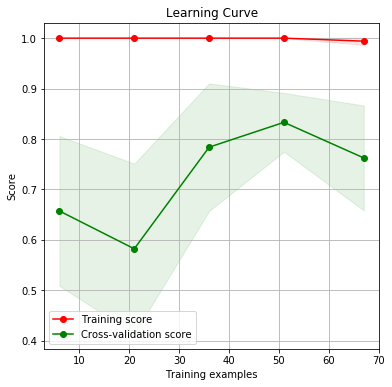

In [25]:
# cross validation using the best fit model
# declare contants
from sklearn.model_selection import cross_val_score
import scikitplot as skplt
def cross_validatin_and_fitting(model, X_train, y_train):
        cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy', 
                                 n_jobs = -1, verbose = 1)
        # Cross Validation Results
        print()
        print("Cross Validation results: ", cv_results)
        prt_string = "CV Mean Accuracy: %f (Std: %f)"% (cv_results.mean(), cv_results.std())
        print(prt_string)
        
        # Final fitting of the Model
        model.fit(X_train, y_train)
        
        print(); print('========================================================')
        print(); print(model.get_params(deep = True))
        print(); print('========================================================')        
        
        # plot learning Curves
        skplt.estimators.plot_learning_curve(model, X_train, y_train, figsize=(6,6))
        plt.show()
        
        return model
model = cross_validatin_and_fitting(model, X_train, y_train)

# Step 4 : Model Evaluation

Now that we will evaluate our Decision tree classification algorithm.


Evaluation of the trained model: 

Accuracy :  0.7727272727272727

Kappa Score :  0.56

Confusion Matrix :
 [[10  5]
 [ 0  7]]

Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.67      0.80        15
           1       0.58      1.00      0.74         7

    accuracy                           0.77        22
   macro avg       0.79      0.83      0.77        22
weighted avg       0.87      0.77      0.78        22



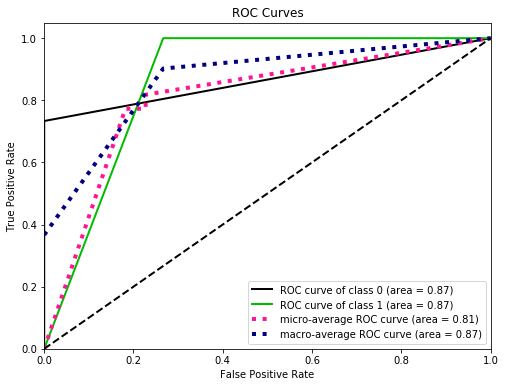

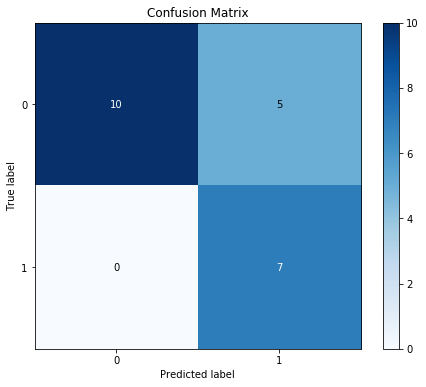

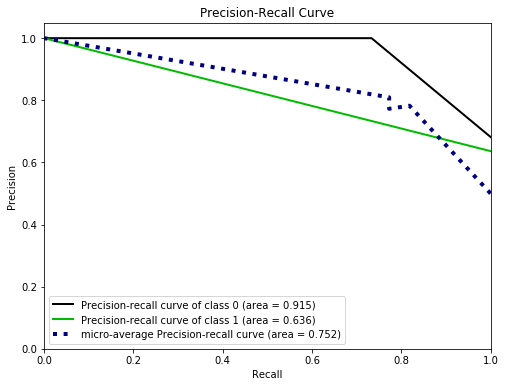

In [26]:
# Evaluate the skill of the Trained model
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import cohen_kappa_score, confusion_matrix
def evaluate_model(model, X_test, y_test):
        pred_Class          = model.predict(X_test)
        acc                 = accuracy_score(y_test, pred_Class)
        classReport         = classification_report(y_test, pred_Class)
        confMatrix          = confusion_matrix(y_test, pred_Class) 
        kappa_score         = cohen_kappa_score(y_test, pred_Class)         
        
        print(); print('Evaluation of the trained model: ')
        print(); print('Accuracy : ', acc)
        print(); print('Kappa Score : ', kappa_score)
        print(); print('Confusion Matrix :\n', confMatrix)
        print(); print('Classification Report :\n',classReport)

        pred_proba = model.predict_proba(X_test)
        
        # Add more plots here using scikit-plot
        # ROC curves
        skplt.metrics.plot_roc(y_test,pred_proba,figsize=(8,6)); plt.show()

        # Confusion matrix
        skplt.metrics.plot_confusion_matrix(y_test,pred_Class,figsize=(8,6)); plt.show()        

        # precision recall curve
        skplt.metrics.plot_precision_recall(y_test, pred_proba, 
                title='Precision-Recall Curve', plot_micro=True, 
                classes_to_plot=None, ax=None, figsize=(8,6), 
                cmap='nipy_spectral', title_fontsize='large', 
                text_fontsize='medium'); plt.show()        
        
        # Add more ... ... ...
        
        return model

model = evaluate_model(model, X_test, y_test)